<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/SVM2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las primeras dos características para visualización
y = iris.target

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Escalar características para normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1)
modelo_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [8]:
# Realizar predicciones en el conjunto de prueba
predicciones = modelo_svm.predict(X_test)

In [9]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.90


In [10]:
# Mostrar un informe de clasificación detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, predicciones))


Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [11]:
# Visualizar la frontera de decisión en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
h = .02  # Tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = modelo_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<Figure size 1000x600 with 0 Axes>

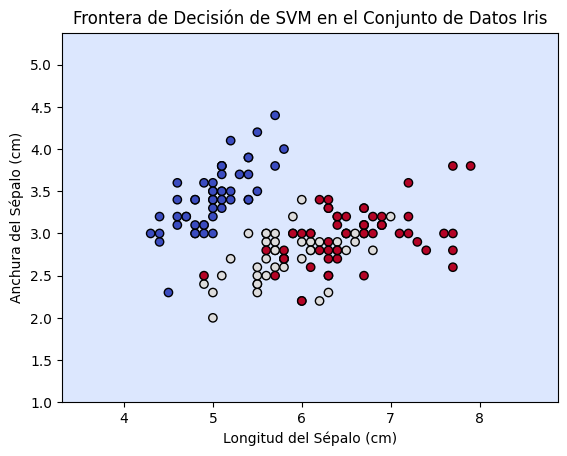

In [12]:
# Visualizar los puntos de datos
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Frontera de Decisión de SVM en el Conjunto de Datos Iris')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Anchura del Sépalo (cm)')
plt.show()

<ipython-input-13-f5ad7d364395>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx_line, yy_line, 'k-', label='Hiperplano', color='black')


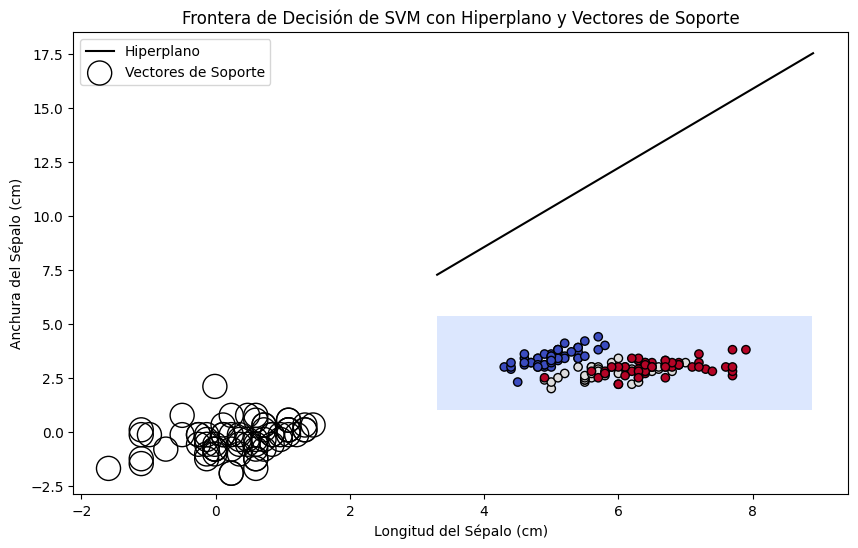

In [13]:
# ... (código anterior)

# Visualizar la frontera de decisión en el conjunto de entrenamiento con hiperplano y vectores de soporte
plt.figure(figsize=(10, 6))
h = .02  # Tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = modelo_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar los puntos de datos
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Dibujar el hiperplano
w = modelo_svm.coef_[0]
a = -w[0] / w[1]
xx_line = np.linspace(x_min, x_max)
yy_line = a * xx_line - (modelo_svm.intercept_[0]) / w[1]
plt.plot(xx_line, yy_line, 'k-', label='Hiperplano', color='black')

# Dibujar los vectores de soporte
plt.scatter(modelo_svm.support_vectors_[:, 0], modelo_svm.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', marker='o', label='Vectores de Soporte')

plt.title('Frontera de Decisión de SVM con Hiperplano y Vectores de Soporte')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Anchura del Sépalo (cm)')
plt.legend()
plt.show()


In [14]:
# Supongamos que las características del nuevo individuo son [5.5, 3.5], por ejemplo.
nuevo_individuo = np.array([[5.5, 3.5]])

# Escalar las características del nuevo individuo usando el mismo escalador
nuevo_individuo_esc = scaler.transform(nuevo_individuo)

# Realizar la predicción con el modelo SVM
clasificacion_nuevo_individuo = modelo_svm.predict(nuevo_individuo_esc)

# Mapear la clase predicha al nombre de la especie en el conjunto de datos Iris
especie_predicha = iris.target_names[clasificacion_nuevo_individuo[0]]

print(f"Las características del nuevo individuo se clasifican como la especie: {especie_predicha}")


Las características del nuevo individuo se clasifican como la especie: setosa
